# Actividad 2 - Clasificación
# Universidad Europea de Madrid
Inteligencia Artificial<br>
Isabel Sutil<br>
M31<br>
Jorge Javier Castilla Coello<br>
Geronimo Basso Sosa<br>
Luis Cabello Casquete<br>
Paula Sáenz de Santa María Diez<br>
Ana Esteban González<br>




# Codigo en común utilizado por todos los apartados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.base import clone
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import make_scorer

# Apartado 0
Modificar el dataset para que cada vez que en "prec" se encuente el valor 0,0 se considere que no llueve, para los demas valores se va a considerar que si ha llovido

In [2]:
# Cargamos el fichero necesario para analizar el modelo.
ruta_archivo = 'valores-climatologicos.csv'
dataframe = pd.read_table(ruta_archivo, sep=',')

#Utilizando una función lambda, para cada valor de ´prec´cambiamos su valor a 0 si la precipitación es 0
#cambiamos el valor a 1 si la precipitación es disitnto de 0. Además, creamos un mapeo de indivaticos de provincia para tener valores de tipo int en esa columna envez de strings.
dataframe['prec'] = dataframe['prec'].apply(lambda x: 'YES' if x > 0 else 'NO')
states = ['1387E', '1387', '1393', '1351', '1400', '1437O', '1473A', '1428', '1475X', '1505', '1484', '1484C', '1495']
state_map = {state: idx for idx, state in enumerate(sorted(set(states)))}
dataframe['indicativo'] = dataframe['indicativo'].apply(lambda x: state_map[x])

# Crear un data set especifico con valores de tipo float para que los modelos puedan entrenar mejor.
# dataframe = dataframe.astype(float)
columns_to_convert = ['indicativo', 'altitud', 'tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'presMax', 'presMin']

# Converting each specified column to float
for column in columns_to_convert:
    dataframe[column] = dataframe[column].astype(float)

# Convertir la columna 'prec' de 'float' a 'categorical'
dataframe['prec'] = pd.Categorical(dataframe['prec'])
print(dataframe)

       indicativo  altitud  tmed prec  tmin  tmax   dir  velmedia  racha  \
0             2.0     98.0  16.9   NO  12.0  21.8   1.0       3.1    8.3   
1             2.0     98.0  20.5  YES  12.5  28.5  22.0       4.7   11.7   
2             2.0     98.0  21.4   NO  17.6  25.1  22.0       2.2   10.3   
3             2.0     98.0  21.4  YES  16.0  26.8  99.0       5.3   10.8   
4             2.0     98.0  18.6   NO  15.7  21.6   4.0       3.9   11.7   
...           ...      ...   ...  ...   ...   ...   ...       ...    ...   
11531        11.0    255.0  12.2   NO   5.5  18.8   8.0       1.7    9.7   
11532        11.0    255.0  11.2  YES   5.4  16.9  99.0       3.6    8.3   
11533        11.0    255.0   9.8  YES   6.4  13.1  27.0       1.7    7.2   
11534        11.0    255.0  11.7   NO   7.5  15.9  19.0       1.9    6.7   
11535        11.0    255.0  10.6  YES   8.7  12.6  20.0       5.0   13.9   

       presMax  presMin  
0       1008.7   1003.9  
1       1008.5   1005.5  
2       1

# Apartado 6
Análisis predictivo con Naive Bayes.

# Crear el dataset de entrenamieno y validación, y además crear el cross validation.

In [3]:
X = dataframe.drop('prec', axis=1)  # Features
y = dataframe['prec']  # Variable de salida

# División en 80/20 para entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))

# Crear conjuntos de entrenamiento y prueba
conjunto_train = pd.concat([X_train, y_train], axis=1)
conjunto_val = pd.concat([X_val, y_val], axis=1)

# Creamos dos conjuntos para poner las predicciones del train y test
conjunto_train_eval = conjunto_train.copy()
conjunto_validation_eval = conjunto_val.copy()

Tamaño del conjunto de entrenamiento: 9228
Tamaño del conjunto de validación: 2308


In [4]:
precision_train = {}
precision_val = {}

# Training Naive Bayes

In [5]:
# Método de control (k-fold cross-validation.)
metodo_control_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [6]:
# Método de control (k-fold cross-validation)
metodo_control_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Crear un pipeline con escalado y clasificador Naive Bayes
nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())

# Definir los parámetros que deseas ajustar
nb_params = {}  # No hay hiperparámetros específicos para ajustar en GaussianNB

In [7]:
# Entrenar el modelo con GridSearchCV para ajustar los hiperparámetros
nb_grid = GridSearchCV(nb_pipeline, nb_params, scoring='accuracy', cv=metodo_control_cv)
nb_grid.fit(X_train, y_train)

# Obtener el mejor modelo
best_nb_model = nb_grid.best_estimator_

In [8]:
# Realizar predicciones con validación cruzada
y_pred_cv = cross_val_predict(best_nb_model, X_train, y_train, cv=metodo_control_cv)

# Calcular la precisión con validación cruzada
accuracy_cv = accuracy_score(y_train, y_pred_cv)

print(f"Precisión con validación cruzada: {accuracy_cv:.2%}")

Precisión con validación cruzada: 66.82%


In [9]:
# Matriz de confusión con validación cruzada
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)

In [10]:
conf_matrix_cv

array([[3122, 1547],
       [1515, 3044]])

/Users/geronimobasso/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


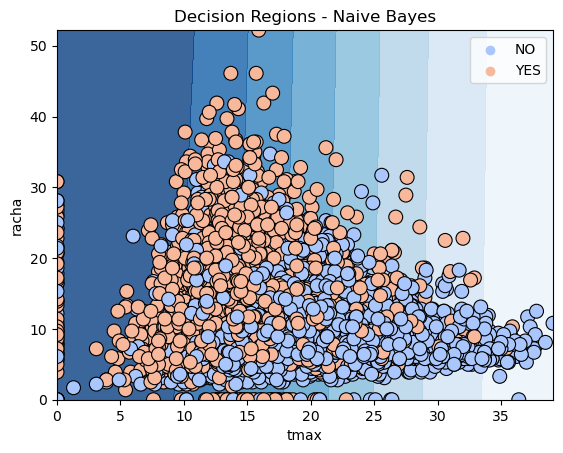

In [12]:
# Obtener el mejor modelo de GridSearchCV
best_nb_model = nb_grid.best_estimator_

# Entrenar el modelo con los datos de entrenamiento
best_nb_model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.linspace(X_train['tmax'].min(), X_train['tmax'].max(), 100), 
                     np.linspace(X_train['racha'].min(), X_train['racha'].max(), 100))

average_values = X_train.mean()

full_data = np.c_[xx.ravel(), yy.ravel()]

for feature in X_train.columns:
    if feature not in ['tmax', 'racha']:
        full_data = np.c_[full_data, np.full(full_data.shape[0], average_values[feature])]

# Use the full dataset for prediction
Z = best_nb_model.predict_proba(full_data)[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Blues', alpha=0.8)

sns.scatterplot(x='tmax', y='racha', hue=y_train, data=X_train, palette='coolwarm', edgecolor='k', s=100)

plt.title('Decision Regions - Naive Bayes')
plt.xlabel('tmax')
plt.ylabel('racha')
plt.legend()
plt.show()


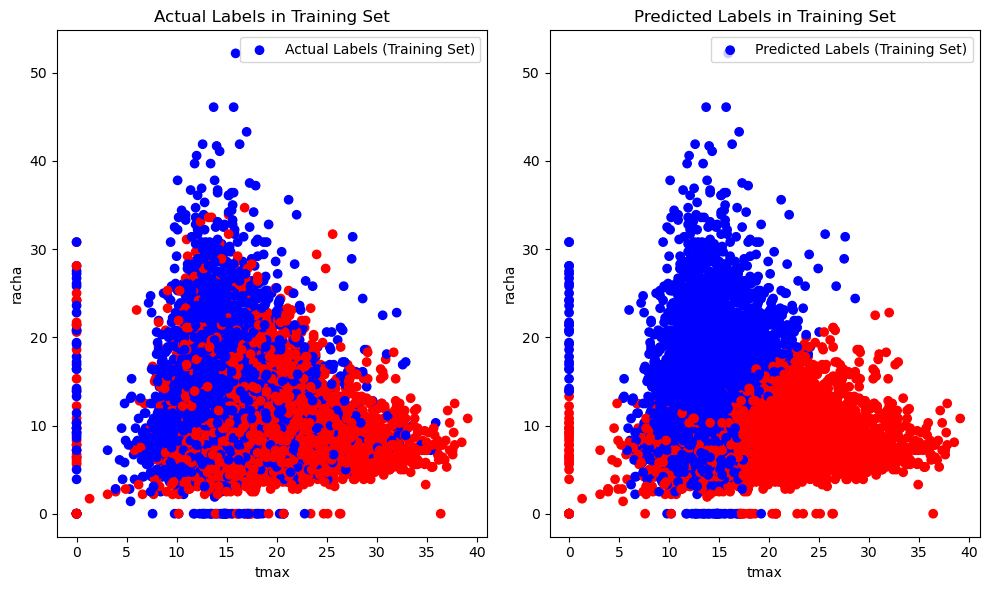

In [13]:
# Predecir las etiquetas para el conjunto de entrenamiento
y_pred_train = best_nb_model.predict(X_train)

# Crear un DataFrame con las características y las etiquetas reales y predichas en el conjunto de entrenamiento
df_train_predictions = X_train.copy()
df_train_predictions['Actual Label'] = y_train
df_train_predictions['Predicted Label'] = y_pred_train

# Graficar los valores reales y predichos en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train['tmax'], X_train['racha'], c=y_train.map({'NO': 'red', 'YES': 'blue'}), label='Actual Labels (Training Set)')
plt.title('Actual Labels in Training Set')
plt.xlabel('tmax')
plt.ylabel('racha')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df_train_predictions['tmax'], df_train_predictions['racha'], c=df_train_predictions['Predicted Label'].map({'NO': 'red', 'YES': 'blue'}), label='Predicted Labels (Training Set)')
plt.title('Predicted Labels in Training Set')
plt.xlabel('tmax')
plt.ylabel('racha')
plt.legend()

plt.tight_layout()
plt.show()

Podemos ver claramente como Naive-Bayes completamente destruye la informacion, aunque respeta y muestra correctamente la frontera, el modelo es incapaz de analizar verdaderamente la profundiad y variedad de los datos, se limita a crear dos grupos homogenos sin variedad entre ellos

In [14]:
# Predecir las etiquetas para el conjunto de validación
y_pred_val = best_nb_model.predict(X_val)

# Calcular la matriz de confusión
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
print("Matriz de Confusión en el conjunto de validación:")
print(conf_matrix_val)

# Calcular y mostrar la precisión en el conjunto de validación
precision_val = accuracy_score(y_val, y_pred_val)
print(f"Precisión en el conjunto de validación: {precision_val:.2%}")


Matriz de Confusión en el conjunto de validación:
[[778 401]
 [398 731]]
Precisión en el conjunto de validación: 65.38%


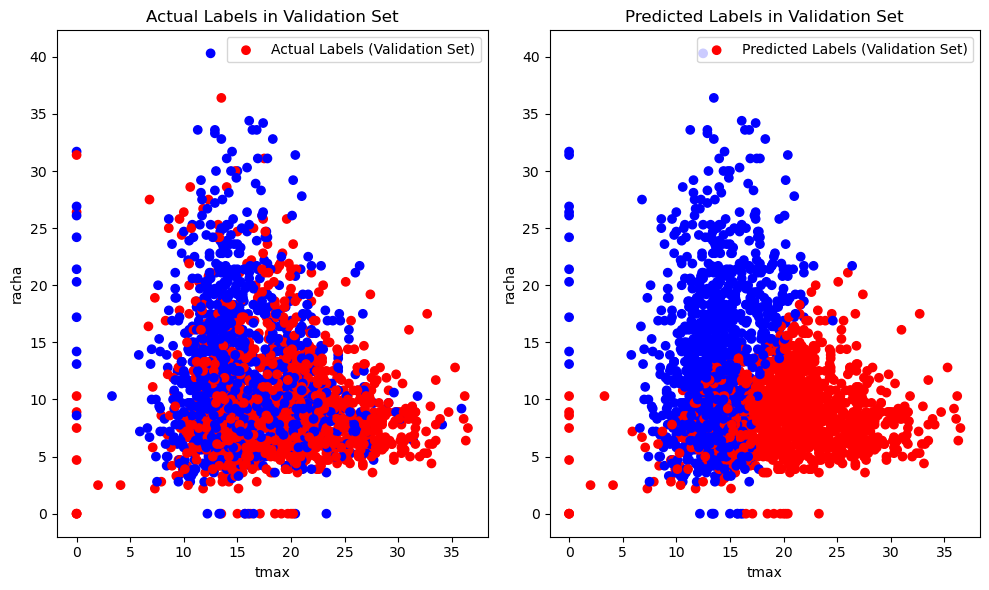

In [15]:
# Predecir las etiquetas para el conjunto de validación
y_pred_val = best_nb_model.predict(X_val)

# Crear un DataFrame con las características y las etiquetas reales y predichas en el conjunto de validación
df_val_predictions = X_val.copy()
df_val_predictions['Actual Label'] = y_val
df_val_predictions['Predicted Label'] = y_pred_val

# Graficar los valores reales y predichos en el conjunto de validación
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_val['tmax'], X_val['racha'], c=y_val.map({'NO': 'red', 'YES': 'blue'}), label='Actual Labels (Validation Set)')
plt.title('Actual Labels in Validation Set')
plt.xlabel('tmax')
plt.ylabel('racha')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df_val_predictions['tmax'], df_val_predictions['racha'], c=df_val_predictions['Predicted Label'].map({'NO': 'red', 'YES': 'blue'}), label='Predicted Labels (Validation Set)')
plt.title('Predicted Labels in Validation Set')
plt.xlabel('tmax')
plt.ylabel('racha')
plt.legend()

plt.tight_layout()
plt.show()


Viendo los numeros de precision es evidente que no hay overfitting, pero los resultados  siguen presentando una uniformidad que no se corresponde con el dataset, las predicciones realizadas por el modelo naive-bayes no son buenas para este dataset ya que no respeta la variedad, hay que usar modelos que generalizen mejor los datos y fuerzen menos las categorias